In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/uber.csv')

df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8918 entries, 0 to 8917
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         8918 non-null   int64  
 1   key                8918 non-null   object 
 2   fare_amount        8917 non-null   float64
 3   pickup_datetime    8917 non-null   object 
 4   pickup_longitude   8917 non-null   float64
 5   pickup_latitude    8917 non-null   float64
 6   dropoff_longitude  8917 non-null   float64
 7   dropoff_latitude   8917 non-null   float64
 8   passenger_count    8917 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 627.2+ KB


In [ ]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [ ]:
df=df.drop(['Unnamed: 0','key','pickup_datetime'],axis=1)
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5.0
...,...,...,...,...,...,...
8913,5.5,-73.995007,40.745027,-74.004968,40.746732,2.0
8914,17.3,-73.994098,40.735441,-73.979597,40.689609,1.0
8915,5.5,-73.963379,40.758320,-73.965309,40.760189,1.0
8916,6.1,-73.991367,40.749675,-74.008058,40.730913,5.0


In [ ]:
df.to_csv('preprocessed_uber_data.csv', index=False)

In [ ]:
df.shape

(8918, 6)

In [ ]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,8917.00000,8917.000000,8917.000000,8917.000000,8917.000000,8917.000000
mean,11.44521,-72.700539,40.000828,-72.673399,40.005821,1.665358
std,10.41732,12.320446,5.895643,9.855862,5.880433,1.286880
min,2.50000,-748.016667,-74.009697,-75.350437,-73.994370,0.000000
25%,6.00000,-73.992015,40.734997,-73.991472,40.733642,1.000000
50%,8.50000,-73.981582,40.752407,-73.979908,40.752997,1.000000
75%,12.50000,-73.967155,40.767058,-73.963588,40.768180,2.000000
max,350.00000,40.770667,41.366138,40.761672,41.366138,6.000000


In [ ]:
df.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [ ]:
df.isna().sum()

fare_amount          1
pickup_longitude     1
pickup_latitude      1
dropoff_longitude    1
dropoff_latitude     1
passenger_count      1
dtype: int64

In [ ]:
# missing values in 'dropoff_longitude' & 'dropoff_latitude'

df['dropoff_longitude']=df['dropoff_longitude'].fillna(df['dropoff_longitude'].mean())
df['dropoff_latitude']=df['dropoff_latitude'].fillna(df['dropoff_latitude'].mean())

In [ ]:
df.isna().sum()

fare_amount          1
pickup_longitude     1
pickup_latitude      1
dropoff_longitude    0
dropoff_latitude     0
passenger_count      1
dtype: int64

In [ ]:
# Haversine formula to calculate distance
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles.
    return c * r


In [ ]:
# Calculate distance for each row
df['distance_km'] = df.apply(lambda row: haversine(row['pickup_longitude'], row['pickup_latitude'],
                                                   row['dropoff_longitude'], row['dropoff_latitude']), axis=1)

#EDA(Exploratory data analysis)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

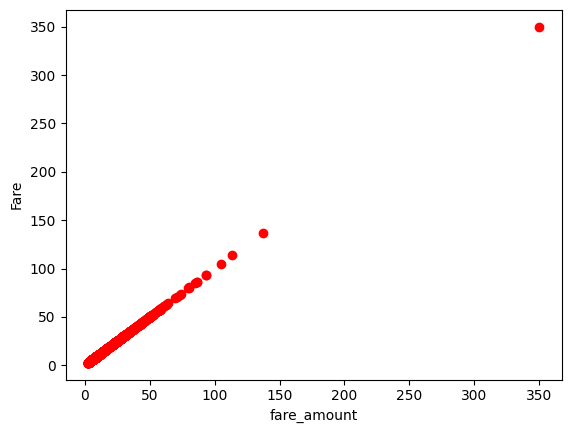

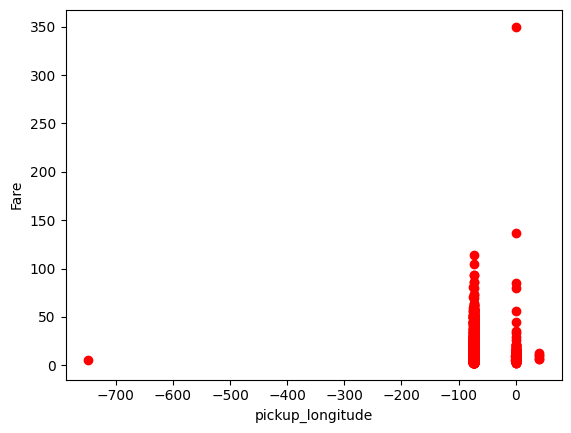

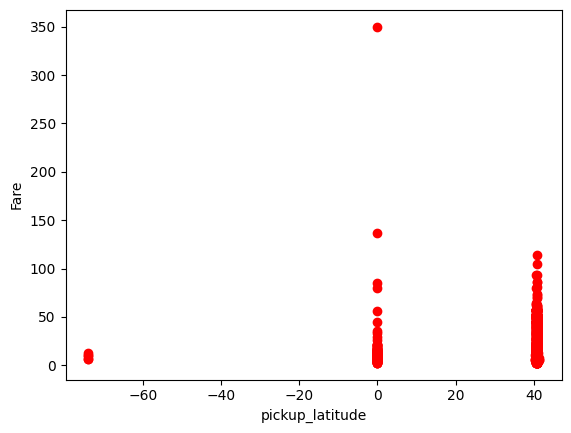

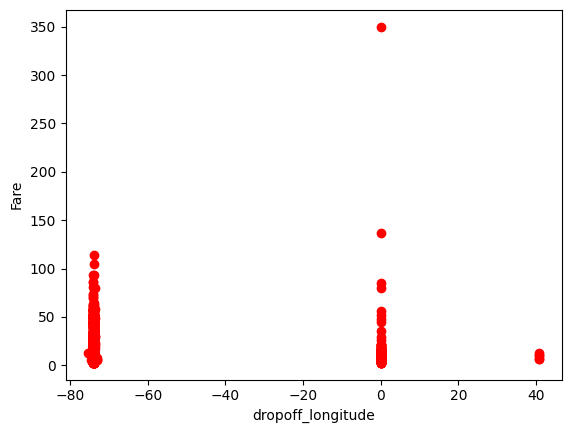

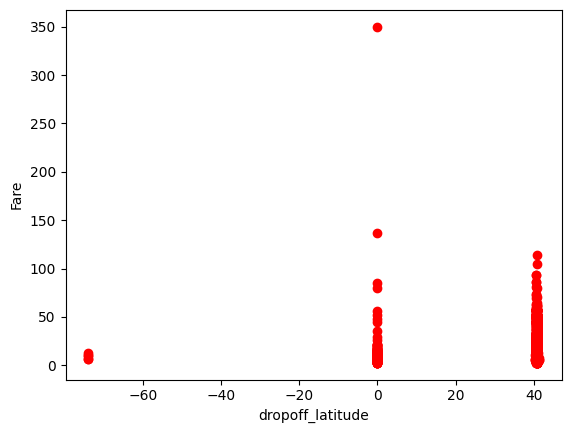

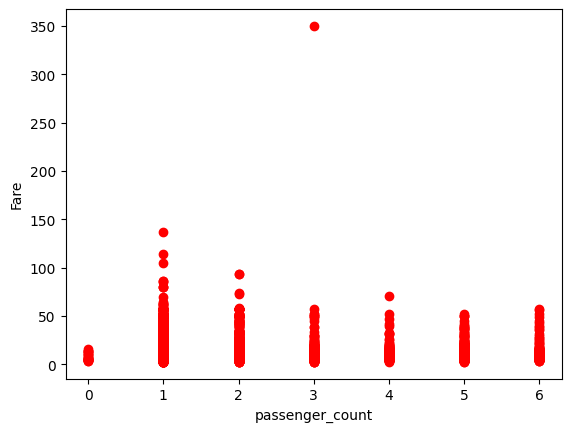

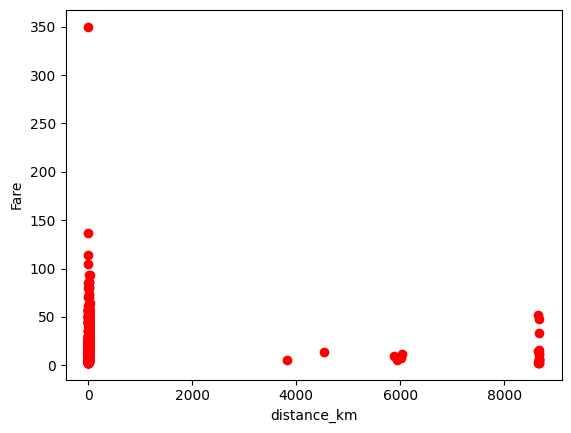

In [ ]:
for i in df.columns:
    plt.xlabel(i)
    plt.ylabel("Fare")
    plt.scatter(df[i],df["fare_amount"],color='red')
    plt.show()

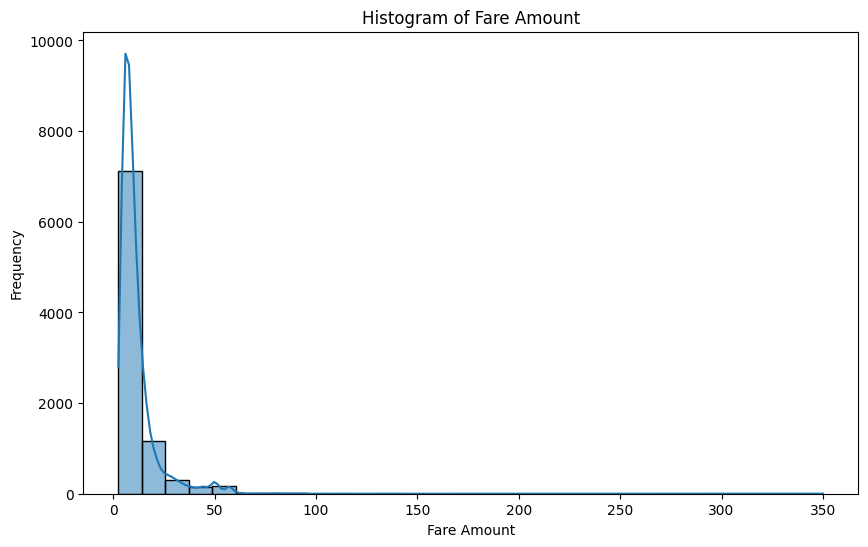

In [ ]:
# Histogram of fare_amount
plt.figure(figsize=(10, 6))
sns.histplot(df['fare_amount'], bins=30, kde=True)
plt.title('Histogram of Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()

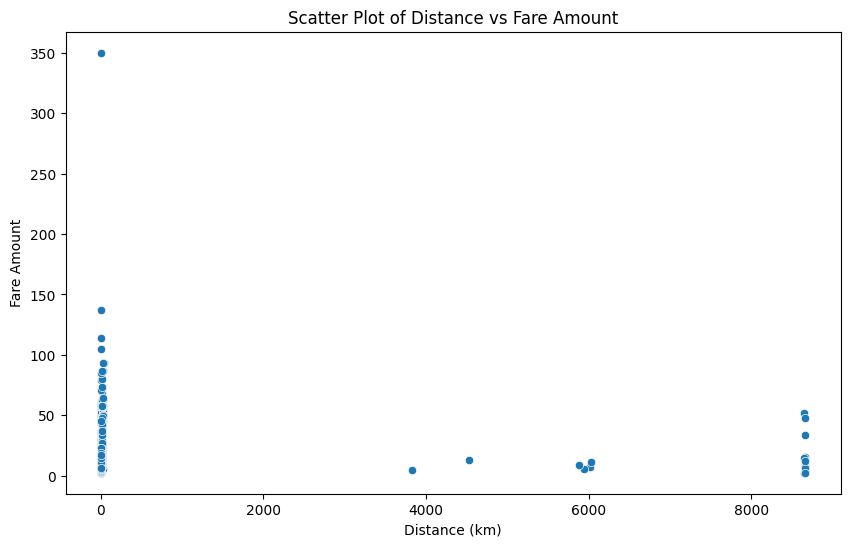

In [ ]:
# Scatter plot of distance vs fare_amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance_km', y='fare_amount', data=df)
plt.title('Scatter Plot of Distance vs Fare Amount')
plt.xlabel('Distance (km)')
plt.ylabel('Fare Amount')
plt.show()

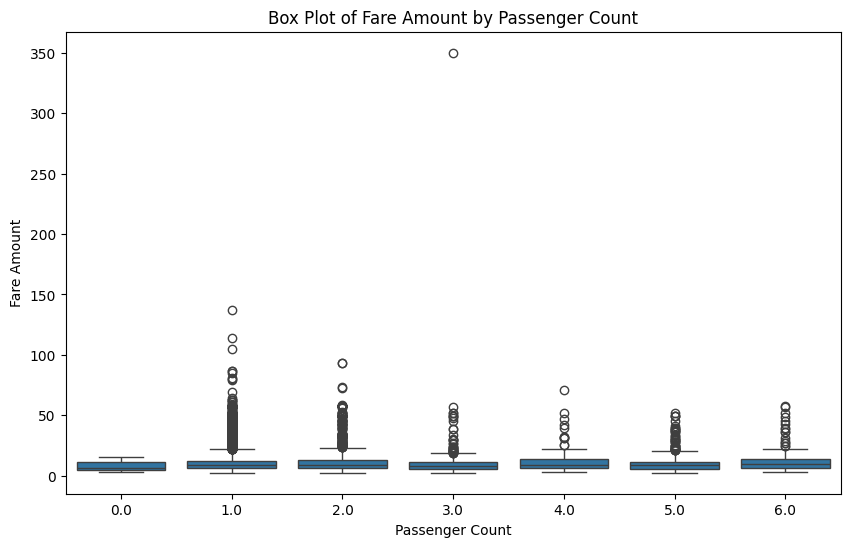

In [ ]:
# Box plot of fare_amount by passenger_count
plt.figure(figsize=(10, 6))
sns.boxplot(x='passenger_count', y='fare_amount', data=df)
plt.title('Box Plot of Fare Amount by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount')
plt.show()

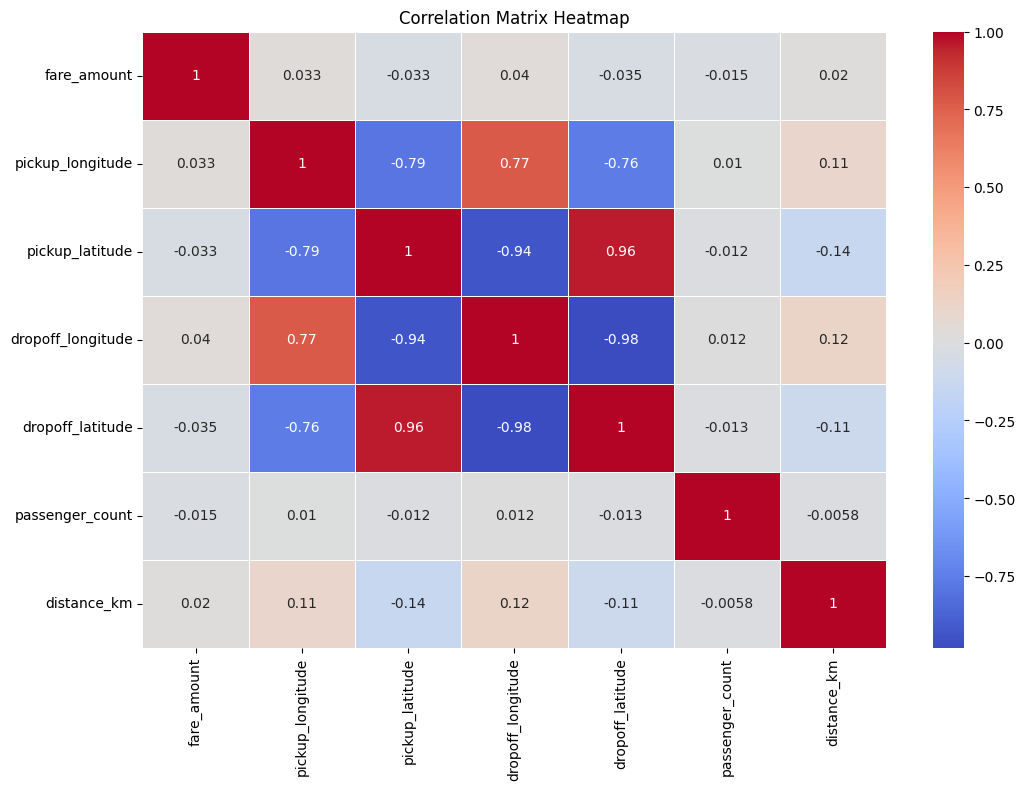

In [ ]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

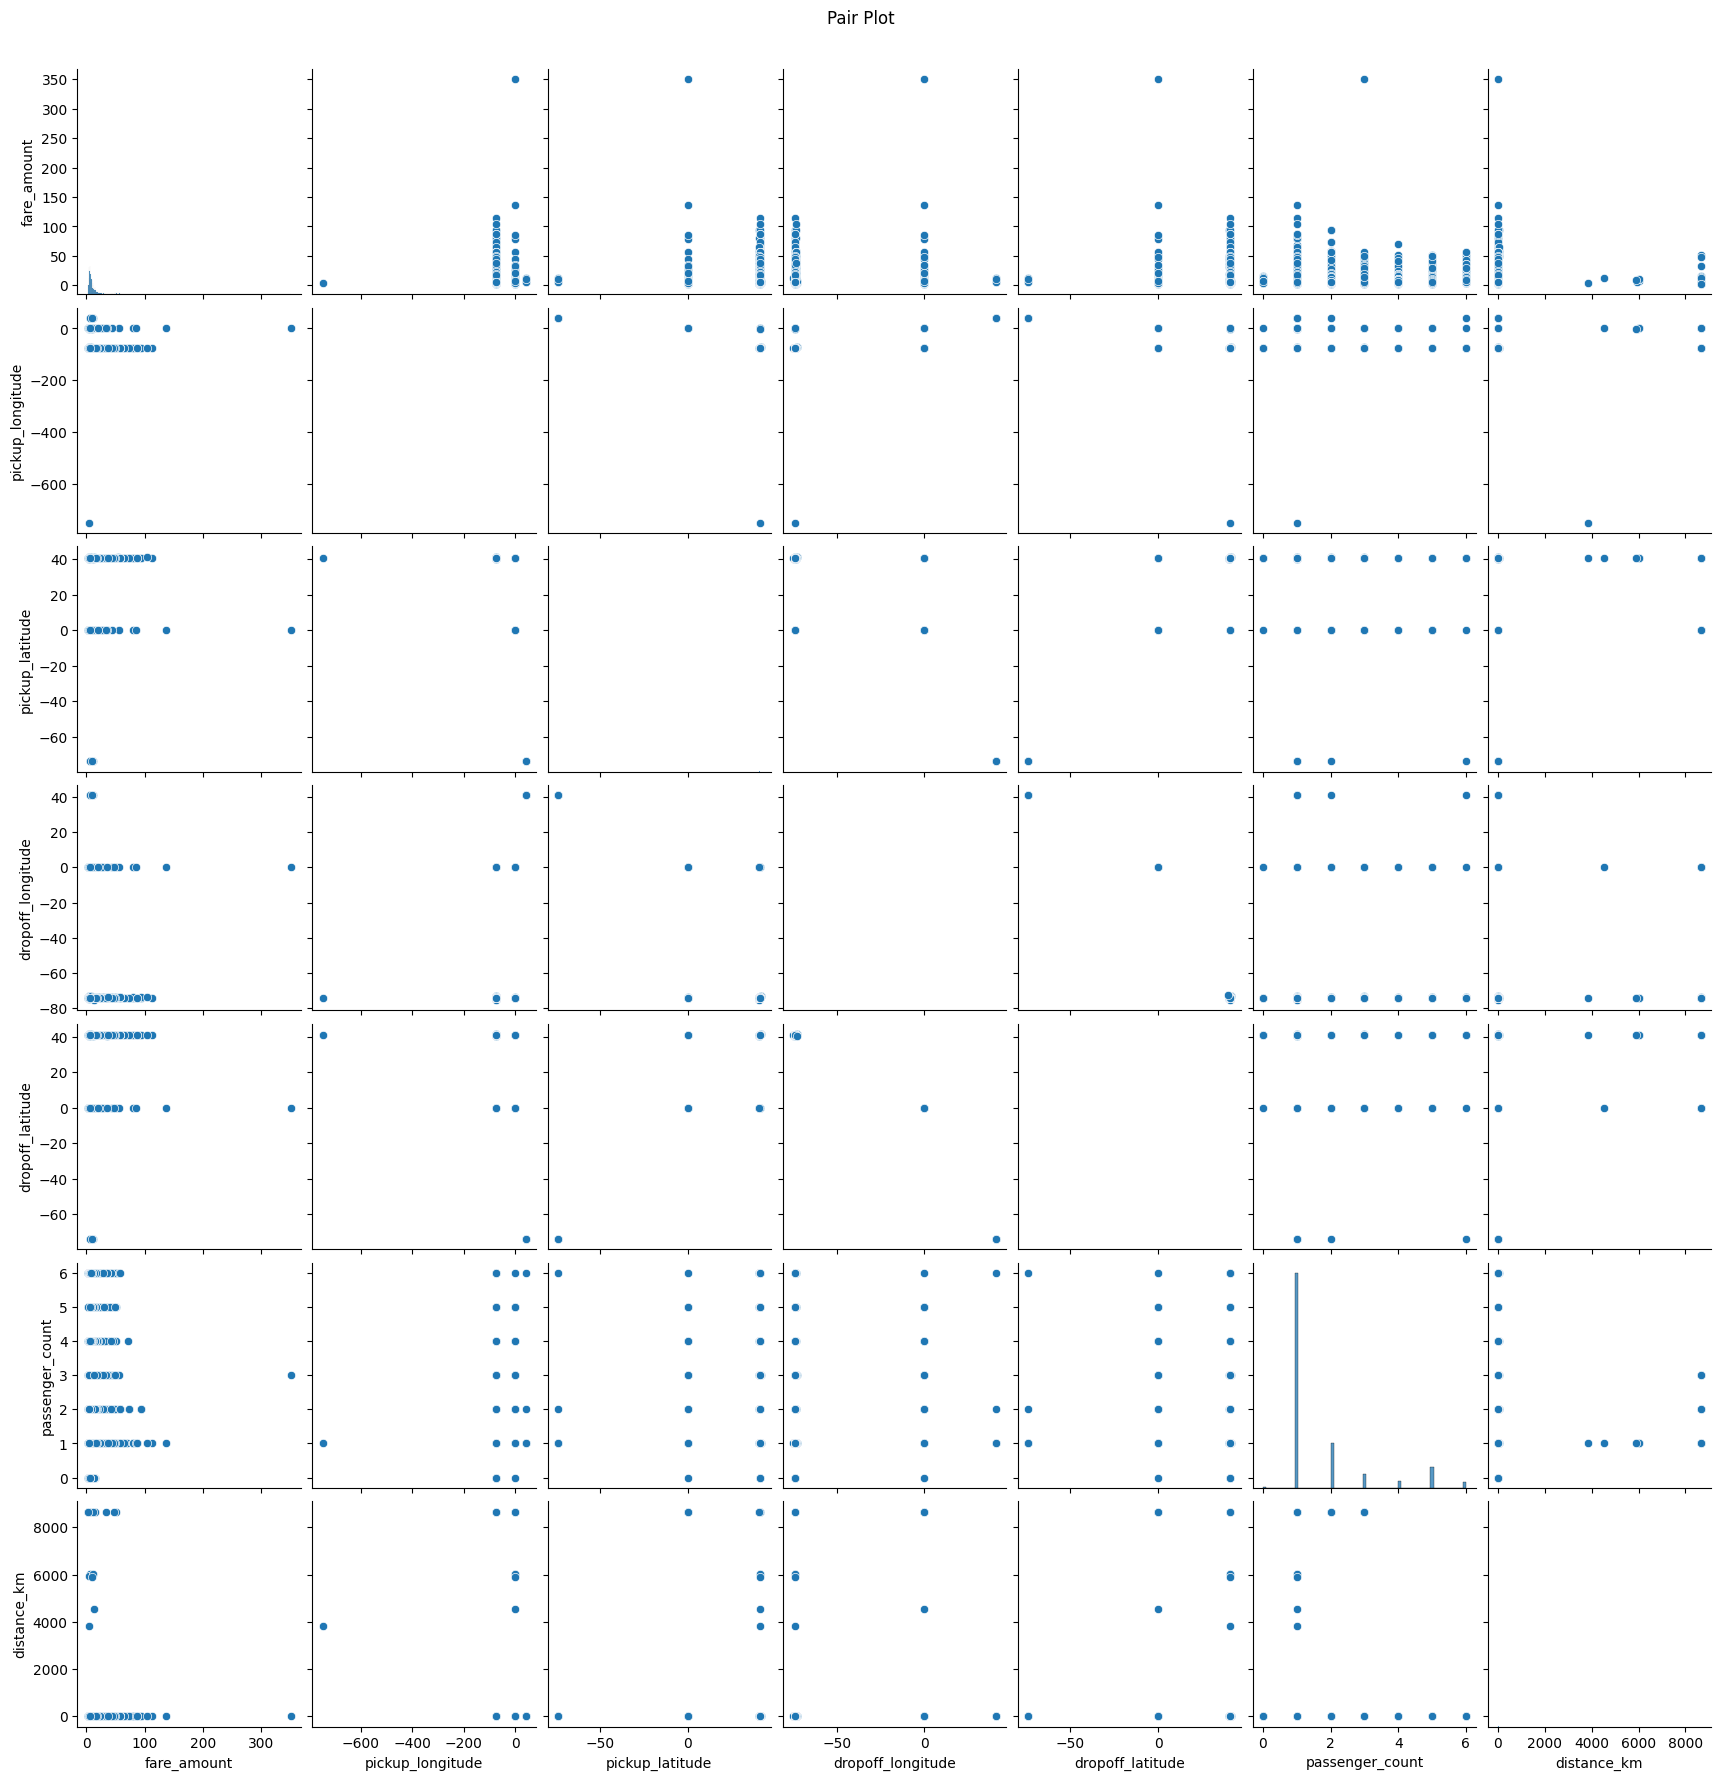

In [ ]:
# Pair plot
sns.pairplot(df[['fare_amount', 'pickup_longitude', 'pickup_latitude',
                 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'distance_km']])
plt.suptitle('Pair Plot', y=1.02)
plt.show()

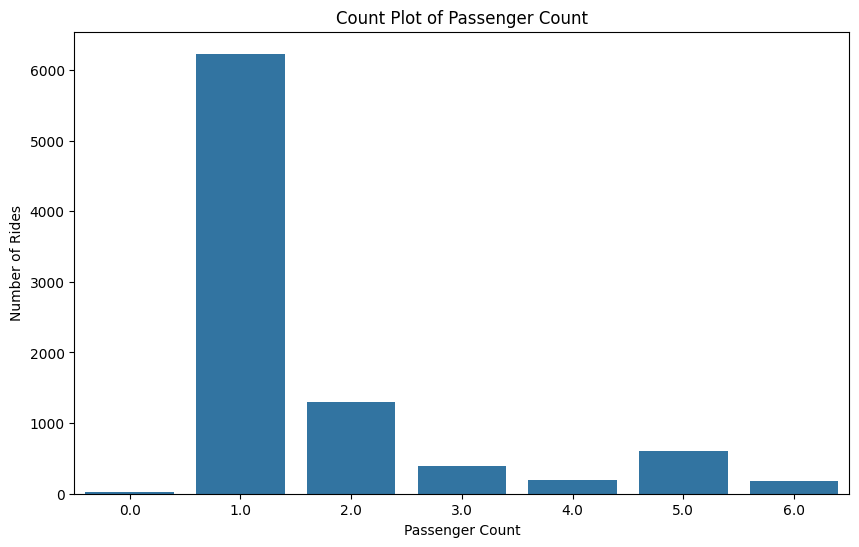

In [ ]:
# Count plot of passenger_count
plt.figure(figsize=(10, 6))
sns.countplot(x='passenger_count', data=df)
plt.title('Count Plot of Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Number of Rides')
plt.show()

#Outlier Detection and Removal Code

In [ ]:
features = ['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'distance_km']

In [ ]:
# Calculate IQR for each feature
Q1 = df[features].quantile(0.25)
Q3 = df[features].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((df[features] < (Q1 - 1.5 * IQR)) | (df[features] > (Q3 + 1.5 * IQR)))

In [ ]:
outliers

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...
8913,False,False,False,False,False,False,False
8914,False,False,False,False,False,False,False
8915,False,False,False,False,False,False,False
8916,False,False,False,False,False,True,False


In [ ]:
df = df[~outliers.any(axis=1)]
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,1.661683
5,4.9,-73.969019,40.755910,-73.969019,40.755910,1.0,0.000000
...,...,...,...,...,...,...,...
8911,11.5,-74.006348,40.738272,-73.981137,40.765825,1.0,3.727794
8912,15.0,-73.983202,40.767807,-73.958845,40.809792,1.0,5.099011
8913,5.5,-73.995007,40.745027,-74.004968,40.746732,2.0,0.860291
8914,17.3,-73.994098,40.735441,-73.979597,40.689609,1.0,5.240796


In [ ]:
# splitting x(inputs) and y(outputs)

X=df.drop(['fare_amount'],axis=1)
Y=df["fare_amount"]
X

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
0,-73.999817,40.738354,-73.999512,40.723217,1.0,1.683323
1,-73.994355,40.728225,-73.994710,40.750325,1.0,2.457590
2,-74.005043,40.740770,-73.962565,40.772647,1.0,5.036377
3,-73.976124,40.790844,-73.965316,40.803349,3.0,1.661683
5,-73.969019,40.755910,-73.969019,40.755910,1.0,0.000000
...,...,...,...,...,...,...
8911,-74.006348,40.738272,-73.981137,40.765825,1.0,3.727794
8912,-73.983202,40.767807,-73.958845,40.809792,1.0,5.099011
8913,-73.995007,40.745027,-74.004968,40.746732,2.0,0.860291
8914,-73.994098,40.735441,-73.979597,40.689609,1.0,5.240796


# Implementing Training and Testing

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Preprocessing Steps

from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

scalar.fit(X_train)

X_train=scalar.fit_transform(X_train)
X_test=scalar.fit_transform(X_test)

In [ ]:
# Display the sizes of the resulting datasets
print("Training set size (X_train):", X_train.shape)
print("Training set size (Y_train):", Y_train.shape)
print("Testing set size (X_test):", X_test.shape)
print("Testing set size (Y_test):", Y_test.shape)

Training set size (X_train): (5376, 6)
Training set size (Y_train): (5376,)
Testing set size (X_test): (1344, 6)
Testing set size (Y_test): (1344,)


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Initialize regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'SVR': SVR(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

In [ ]:
# Train and evaluate each model
results = []

for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(Y_test, Y_pred)
    mae = mean_absolute_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    # Store results
    results.append({
        'Model': name,
        'MSE': mse,
        'MAE': mae,
        'R2': r2
    })

In [ ]:
# Create a DataFrame to display results
results_df = pd.DataFrame(results)

print(results_df)

                   Model       MSE       MAE        R2
0      Linear Regression  5.203942  1.608586  0.646456
1       Ridge Regression  5.203906  1.608643  0.646458
2       Lasso Regression  6.202332  1.867296  0.578628
3  ElasticNet Regression  7.053588  2.023406  0.520795
4          Decision Tree  9.297219  2.131421  0.368368
5                    SVR  4.870203  1.457215  0.669129
6          Random Forest  4.847877  1.552179  0.670646
7               AdaBoost  8.677182  2.497826  0.410492
8      Gradient Boosting  4.945962  1.556137  0.663983
9                XGBoost  5.525449  1.638348  0.624613


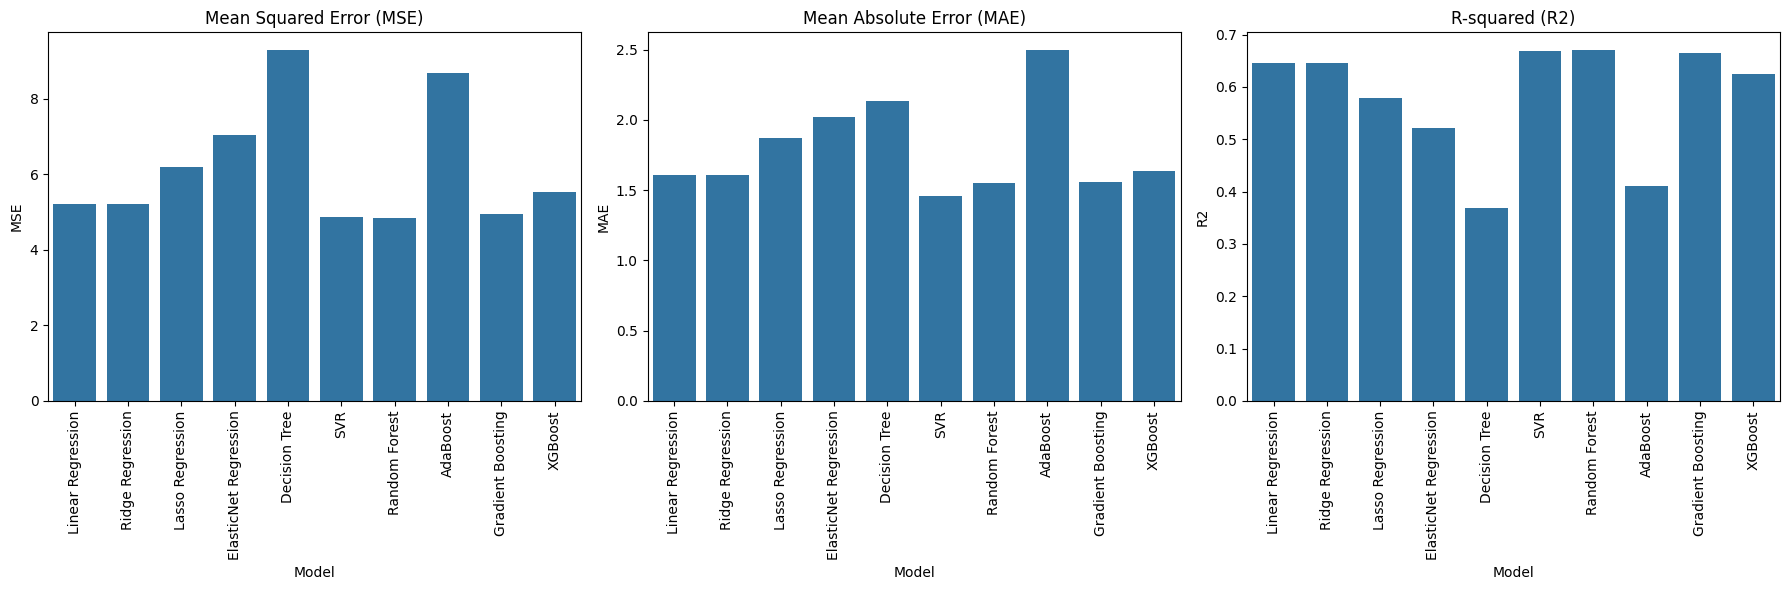

In [ ]:
# Visualization of performance metrics
plt.figure(figsize=(18, 6))

# Plot MSE
plt.subplot(1, 3, 1)
sns.barplot(x='Model', y='MSE', data=results_df)
plt.xticks(rotation=90)
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Model')
plt.ylabel('MSE')

# Plot MAE
plt.subplot(1, 3, 2)
sns.barplot(x='Model', y='MAE', data=results_df)
plt.xticks(rotation=90)
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Model')
plt.ylabel('MAE')

# Plot R-squared
plt.subplot(1, 3, 3)
sns.barplot(x='Model', y='R2', data=results_df)
plt.xticks(rotation=90)
plt.title('R-squared (R2)')
plt.xlabel('Model')
plt.ylabel('R2')

plt.tight_layout()
plt.show()

In [ ]:
import pickle

# Assuming best_model is your trained XGBRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, Y_train)

# Save the model to a file
with open('best_model1.pkl', 'wb') as f:
    pickle.dump(model, f)
